# Atividade avançada- implementação do ```plt.imshow()```

A partir dos dados da atividade mínima e utilizando o ```np.load```, foi criado o mapa de calor. Para isso, foi estabelecida a função 


```
def mapa_calor_histograma(posicoes, titulo, subplot):
    hist, x_edges, y_edges = np.histogram2d(  #cria um histograma bidimensional)
        np.arange(len(posicoes)),  # cria uma sequencia do tamanho da lista posições
        posicoes,                  # eixo y: posições
        bins=[30, 30]              # número de bins para cada eixo(30 divisoes em cada direção )
    )

```
para criar o histograma. Essa função retorna hist: A matriz 2D com a contagem de ocorrências em cada bin; x_edges: os limites dos bins no eixo x; y_edges: os limites dos bins no eixo y. Por fim, para criar o mapa das cores, foi utilizado o ```plt.imshow()``` para exibir o mapa a partir de uma matriz de valores


```
plt.imshow(hist.T,  #transposta da matriz do histrograma para que os eixos não fiquem invertidos
    aspect='auto', 
    origin='lower', # Define que a origem (0,0) da imagem será no canto inferior esquerdo.
    cmap='viridis',  #estilo do mapa das cores
    extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])  Define os limites dos eixos x e y na imagem.
```

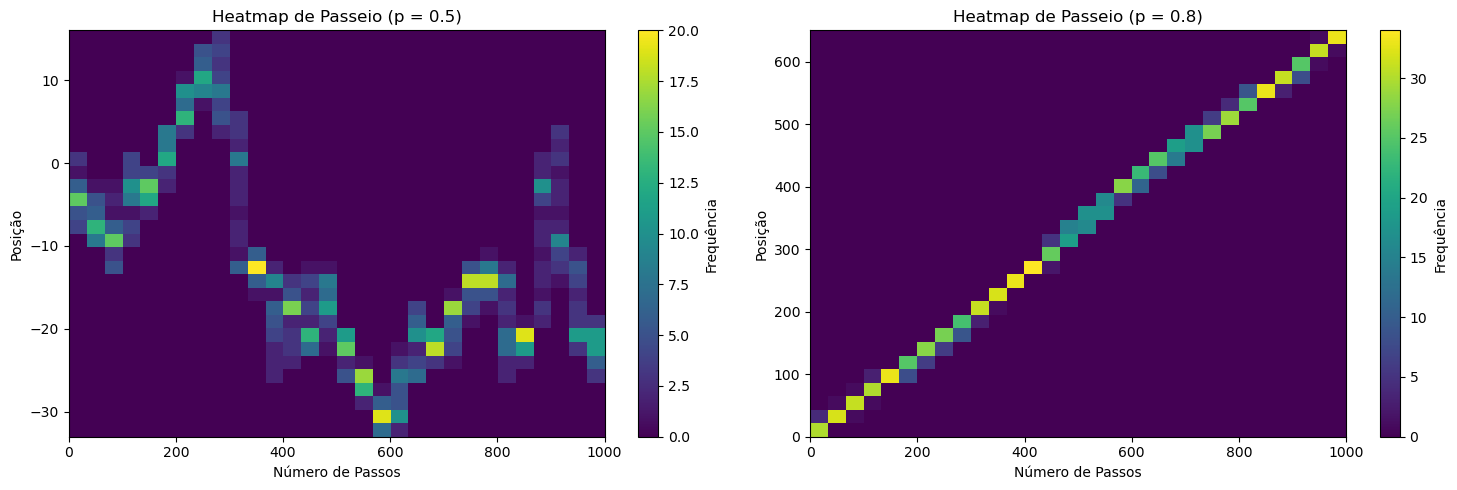

In [2]:
import numpy as np
import matplotlib.pyplot as plt


dados1 = np.load('Dados_passeio_p_0.5.npz')
dados2 = np.load('Dados_passeio_p_0.8.npz')


posicoes1 = dados1['valores_posicao']
posicoes2 = dados2['valores_posicao']


plt.figure(figsize=(15, 5))

# Função para criar heatmap do histograma
def mapa_calor_histograma(posicoes, titulo, subplot):
    hist, x_edges, y_edges = np.histogram2d(
        np.arange(len(posicoes)),  
        posicoes,                  
        bins=[30, 30]              
    )
    
    # Plotar heatmap
    plt.subplot(subplot)
    plt.imshow(hist.T, 
               aspect='auto', 
               origin='lower', 
               cmap='viridis', 
               extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
    plt.colorbar(label='Frequência')
    plt.title(titulo)
    plt.xlabel('Número de Passos')
    plt.ylabel('Posição')

#p = 0.5
mapa_calor_histograma(posicoes1, 'Heatmap de Passeio (p = 0.5)', 121)

#p = 0.8
mapa_calor_histograma(posicoes2, 'Heatmap de Passeio (p = 0.8)', 122)

plt.tight_layout()
plt.show()